## Import of Libraries

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data

Pandas function Usage example  
#### df = pd.read_csv(csv_file_path, sep=';', header=0, index_col='ID', usecols=['ID', 'Name', 'Age'])  
sep: Specifies the delimiter used in the CSV file. The default is a comma (,).  
header: Specifies which row to use as the column names. If set to None, the default column names will be used.  
index_col: Specifies which column to use as the row labels (index).  
usecols: Specifies which columns to read from the file.  


In [3]:
#Reading the csv file 
data1 = pd.read_csv("train.csv",index_col='id')
print("Data Columns:",list(data1.columns.values))
# data1.head()
data_test = pd.read_csv("test.csv",index_col='id')
print("Data Columns:",list(data_test.columns.values))

Data Columns: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
Data Columns: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']


In [4]:
data1.head()
data1.shape
data1.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [5]:
def plot_categorical_counts(data, columns):
    """
    Plot counts of categorical columns.

    Parameters:
    data (pd.DataFrame): The dataset to visualize.
    columns (list): List of categorical columns to visualize.
    """
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=column, data=data, palette='viridis')
        plt.title(f"Count Plot for {column}")
        plt.xticks(rotation=45)
        plt.show()
              
def visualize_distributions(data, columns):
    """
    Visualize the distributions of numerical columns.

    Parameters:
    data (pd.DataFrame): The dataset to visualize.
    columns (list): List of numerical columns to visualize.
    """
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
def summary_statistics(data):
    """
    Compute and print summary statistics for numerical columns.

    Parameters:
    data (pd.DataFrame): The dataset to analyze.

    Returns:
    pd.DataFrame: Summary statistics.
    """
    summary = data.describe()
    print("\nSummary Statistics:")
    print(summary)
    return summary

def plot_multiple_boxplots(data):
    """
    Plot multiple boxplots for all numerical variables in the dataset.

    Parameters:
    data (pd.DataFrame): The dataset to visualize.
    """
    numerical_columns = data.select_dtypes(include=[np.number]).columns
    if numerical_columns.empty:
        print("No numerical columns found in the dataset.")
        return

    plt.figure(figsize=(15, 8))
    data_melted = data[numerical_columns].melt(var_name='Variable', value_name='Value')
    sns.boxplot(x='Variable', y='Value', data=data_melted, palette='Set3')
    plt.title("Boxplots for All Numerical Variables")
    plt.xticks(rotation=45)
    plt.show()


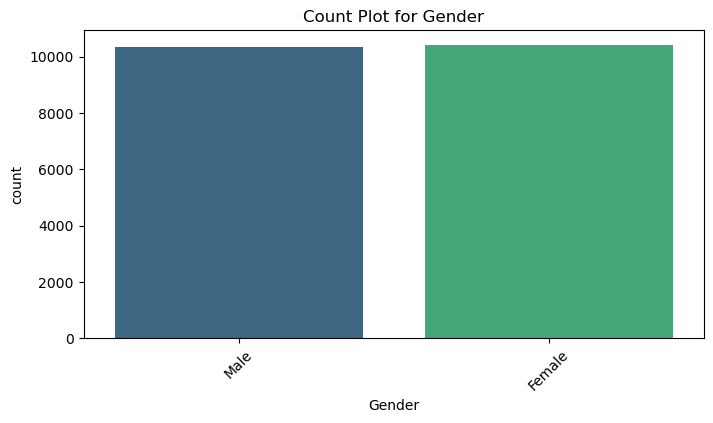

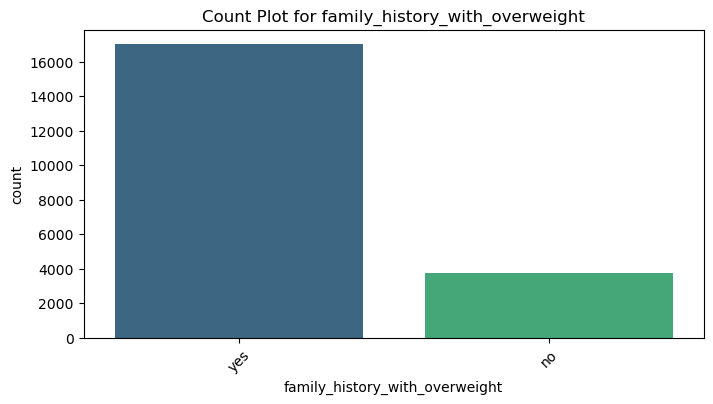

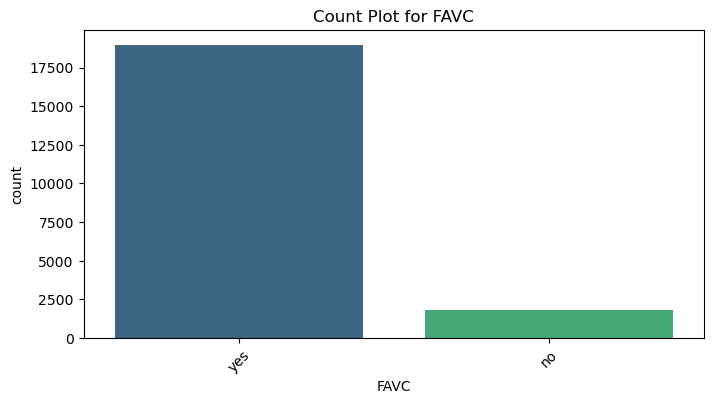

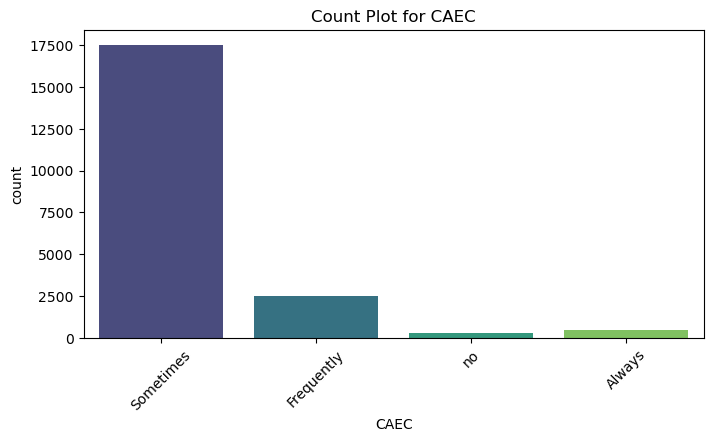

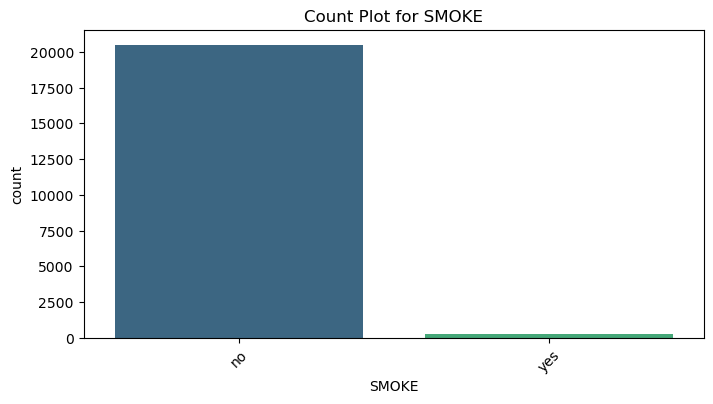

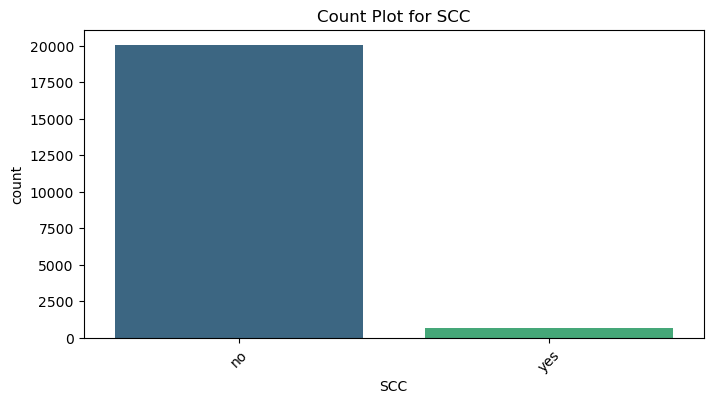

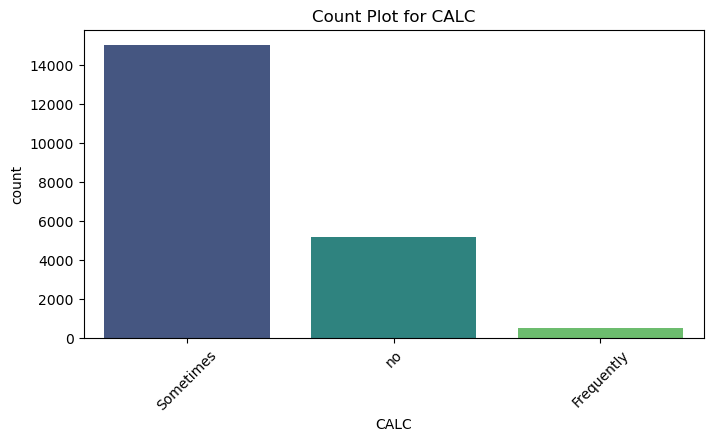

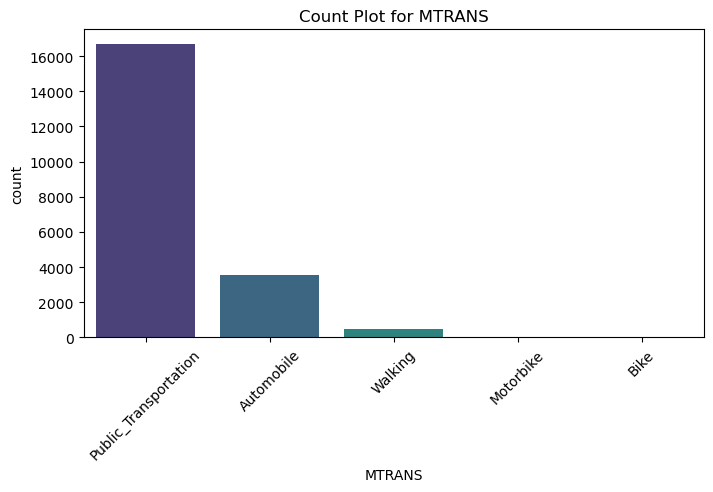

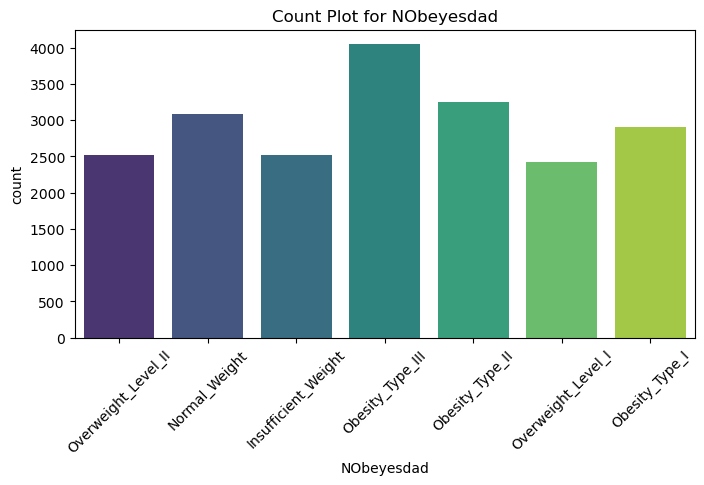

In [12]:
# Separate numerical and categorical columns
numerical_features = data1.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data1.select_dtypes(exclude=[np.number]).columns.tolist()

plot_categorical_counts(data1,categorical_features)

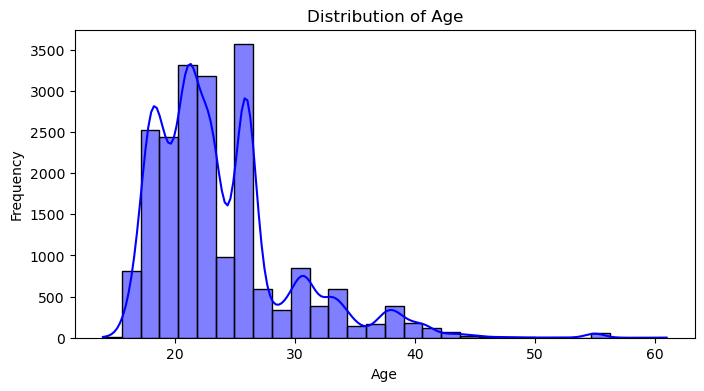

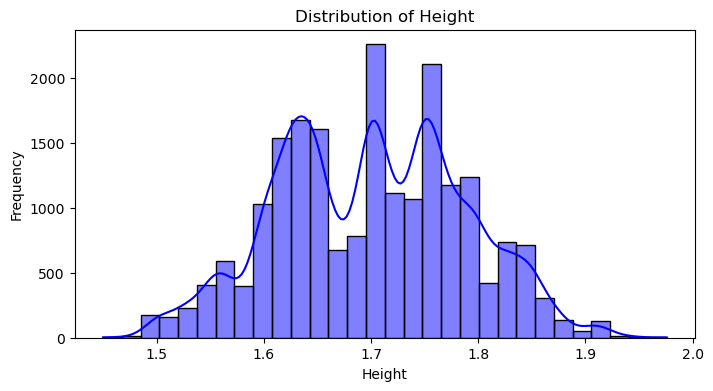

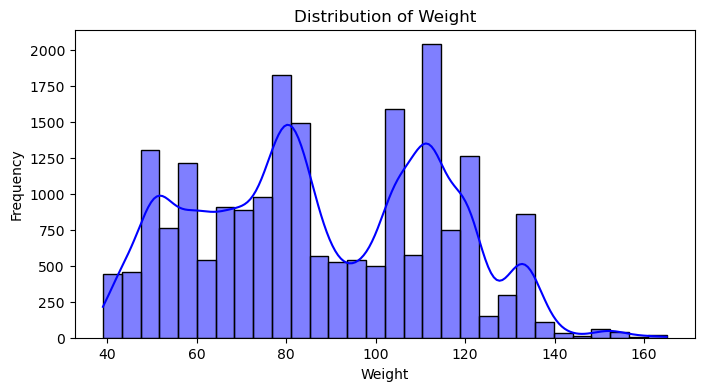

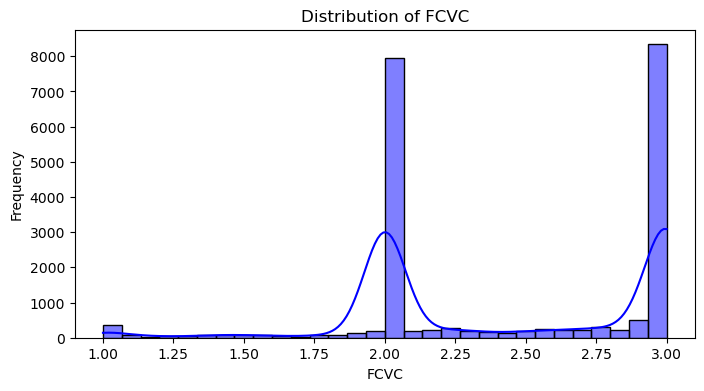

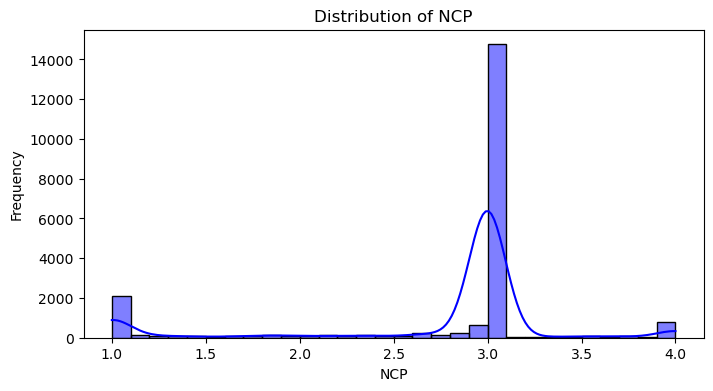

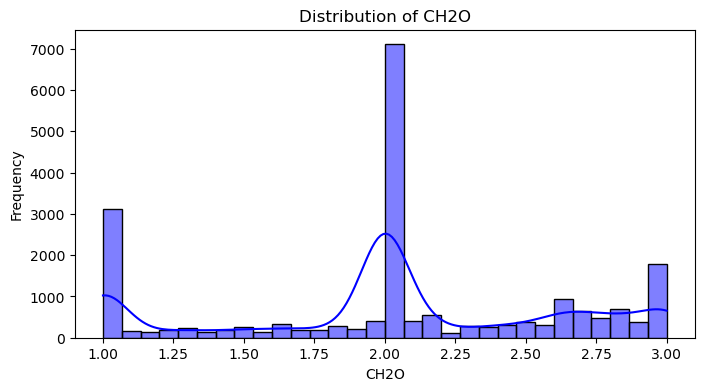

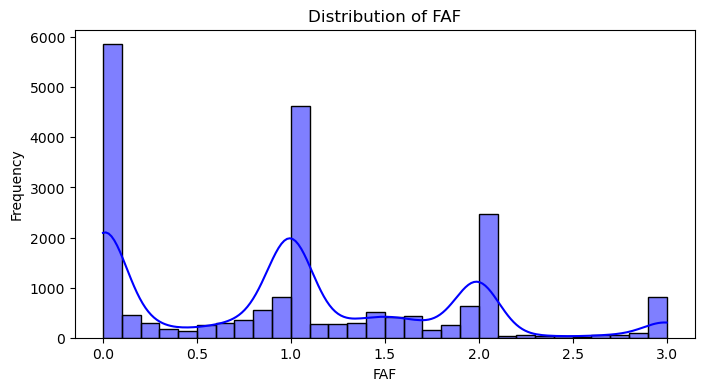

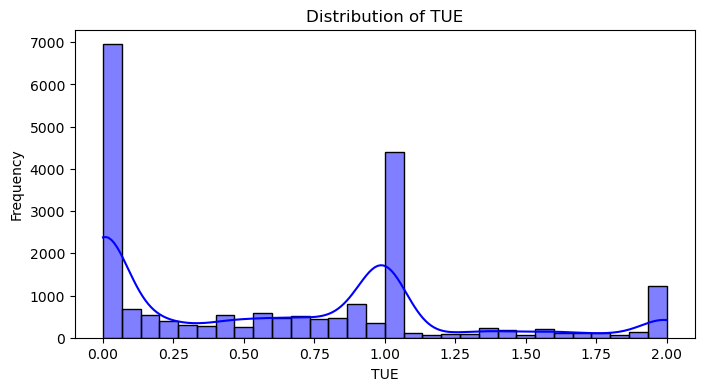

In [13]:
visualize_distributions(data1, numerical_features)

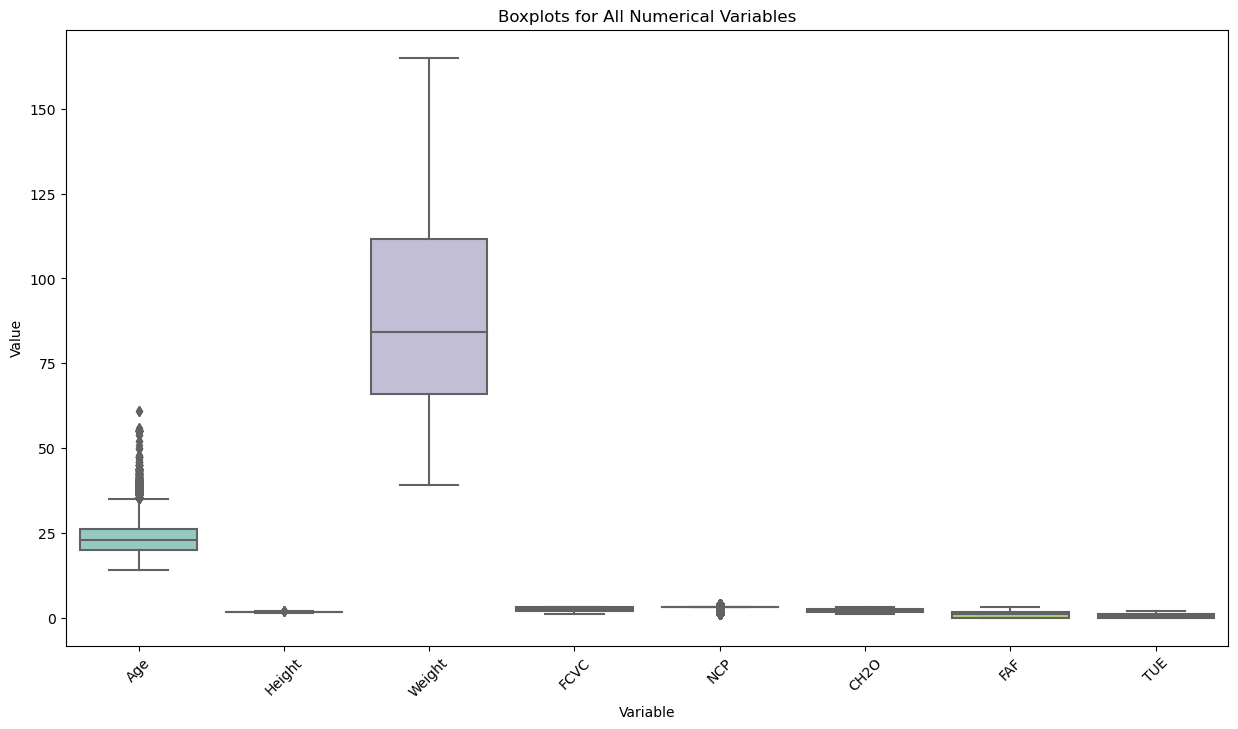

In [14]:
plot_multiple_boxplots(data1)

In [15]:
summary_statistics(data1)


Summary Statistics:
                Age        Height        Weight          FCVC           NCP  \
count  20758.000000  20758.000000  20758.000000  20758.000000  20758.000000   
mean      23.841804      1.700245     87.887768      2.445908      2.761332   
std        5.688072      0.087312     26.379443      0.533218      0.705375   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631856     66.000000      2.000000      3.000000   
50%       22.815416      1.700000     84.064875      2.393837      3.000000   
75%       26.000000      1.762887    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  
mean       2.029418      0.981747      0.616756  
std        0.608467      0.838302      0.602113  
min        1.000000      0.000000      0.000000  
25%        1.7920

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## Removing the irrelevant features 

In [4]:
# data1.head()
data_x = data1.drop(["NObeyesdad"],axis = 1)
data_y = data1["NObeyesdad"]
# data_x.head()
# data_y.head()
print(data_y.unique())

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [5]:
# # Understand the data types of each variable in a dataframe 
# print(data_x.dtypes)
# print(data_x.apply(lambda col: col.unique()))
# print(data_x.nunique())

## Check if there are missing values in a dataframe

In [6]:
data_x.isnull().sum()
data_test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

## Filling the missing values
If there are any missing values go to below section
Here we will use the mean or mode method to fill the missing values.  
If the values are categorical then we use the mode.  
For the numerical values we use the median.  

In [7]:
# # Dataframe using mean of the columns 
# # Using the mode for the categorical columns
# columns_to_handle = ["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]
# data_x[columns_to_handle] = data_x[columns_to_handle].fillna(data_x[columns_to_handle].mode())
# data_test_x[columns_to_handle] = data_test_x[columns_to_handle].fillna(data_test_x[columns_to_handle].mode())

# # Using mean for the numerical column
# columns_to_handle = ["Age",]
# data_x[columns_to_handle] = data_x[columns_to_handle].fillna(data_x[columns_to_handle].mean())
# data_test_x[columns_to_handle] = data_test_x[columns_to_handle].fillna(data_test_x[columns_to_handle].mean())

# # To ensure that we do not have any Nan values in a dataframe
# count = data_x.isna().sum()
# count_test = data_test_x.isna().sum()
# print(count_test)

# Encoding for the categorical columns

In [8]:
data_y.head()

id
0    Overweight_Level_II
1          Normal_Weight
2    Insufficient_Weight
3       Obesity_Type_III
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

In [9]:
#categorical columns in training data x
columns_to_handle = ["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]

label_encoders = {}
for col in columns_to_handle:
    le = LabelEncoder()
    data_x[col + '_encoded'] = le.fit_transform(data_x[col])
    label_encoders[col] = le

# Drop original columns
data_x.drop(columns=columns_to_handle, inplace=True) 

label_encoders = {}
for col in columns_to_handle:
    le = LabelEncoder()
    data_test[col + '_encoded'] = le.fit_transform(data_test[col])
    label_encoders[col] = le

# Drop original columns
data_test.drop(columns=columns_to_handle, inplace=True) 

# categorical columns in the y 
label_encoder = LabelEncoder()
data_y_encoded = label_encoder.fit_transform(data_y)
# print(data_y_encoded)

## Test train split for the data 

In [10]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y_encoded, test_size=0.3, random_state=42)

In [11]:
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols]  = scaler.transform(X_val[num_cols])
data_test[num_cols] = scaler.transform(data_test[num_cols])


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


## Problem Statement 
we need to predict the obesity. The data has 6 types 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I','Obesity_Type_I'. Hence it is a  Multi class classification problem.
We will use the  Supervised learning classification methods as below:  
1. SVM
2. K nearest neighbor
3. using boost

### 1. SVM
We will do the scaling of the data for better perfromance.

In [12]:
# One Vs One 

clf = svm.SVC(decision_function_shape='ovo',random_state=0)
# One Vs Rest
lin_clf = svm.LinearSVC(dual="auto",random_state=0)

clf.fit(X_train_balanced,y_train_balanced)

predictions = clf.predict(X_val)
s = clf.score(X_val, y_val, sample_weight=None)
print(" Accuracy score:",s)

 Accuracy score: 0.8728323699421965


### 2. XGBoost classifier

In [15]:
XGB_clf = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=0)
XGB_clf.fit(X_train_balanced,y_train_balanced)
predictions = XGB_clf.predict(X_val)
s = clf.score(X_val, y_val, sample_weight=None)
print(" Accuracy score:",s)

 Accuracy score: 0.8728323699421965


### 3. Random Forest Classfier

In [38]:
rf = RandomForestClassifier(random_state=20)
rf.fit(X_train_balanced,y_train_balanced)
predictions = rf.predict(X_val)
s = rf.score(X_val, y_val, sample_weight=None)
print(" Accuracy score:",s)


 Accuracy score: 0.8945086705202312


## Hyperparameter tuning for Random Forest

In [39]:
param_grid = {'n_estimators': [100,150,200],
             'max_depth':[None,10,20],
             'min_samples_split': [2, 5, 10]}

rf_random = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 5,n_jobs = -1)
rf_random.fit(X_train_balanced,y_train_balanced)
best_rf = rf_random.best_estimator_
predictions = best_rf.predict(X_val)
s = best_rf.score(X_val, y_val, sample_weight=None)
print(" Accuracy score:",s)

 Accuracy score: 0.8967565831727682


In [37]:
test_predictions = best_rf.predict(data_test)
df_submission = pd.DataFrame({'id': data_test.index, 'NObeyesdad': label_encoder.inverse_transform(test_predictions)})
df_submission.to_csv('submission.csv', index=False)